# Inaugural Project Spring 2021

**Team:** Aristochats

**Members:** Theresa Berz (txj188), Adrian Moise (bln333), Nam Anh Nguyen (xgw631), Karen Thule (lnc394)


# Question 1

Isolating $c$ in equation (3), we find 

$$c=m-\tau\left(p_{h},\tilde{p}_{h}\right)$$

Now, inserting (4) into $c$ we find

$$c=m-(rp_{h}+\tau^{g}\tilde{p}_{h}+\tau^{p}\text{max}\left\{ \tilde{p}_{h}-\bar{p},0\right\})$$

Thus, we can write up the objective of the household is now written as 

$$c^{*},h^{*}=\text{argmax}\left(m-(rp_{h}+\tau^{g}\tilde{p}_{h}+\tau^{p}\text{max}\left\{ \tilde{p}_{h}-\bar{p},0\right\}) \right)^{1-\phi}h^{\phi}$$

In [18]:
#Import 
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt  
from types import SimpleNamespace 

plt.style.use("seaborn")

#Define the parameters in the SimpleNamespace with the name 'values' 
values = SimpleNamespace()
values.epsilon=0.5
values.r=0.03
values.m=0.5
values.tg=0.012
values.tp=0.004
values.pquer=3
values.phi=0.3


#Define the utility function
def u_func(h, values):
    """A function that computes utility
    args:
    h (float):amount of housing consumption
    values (Simplenamespace): parameters in the utility function
    
    Returns a float"""
    phtilde = h*values.epsilon
    u = (values.m-(values.r*h + values.tg*phtilde + values.tp*max(h*values.epsilon - values.pquer,0)))**(1-values.phi)*h**values.phi  
    return u



    
#Define the optimizer 
def u_optimiser(values):
    """
     A function that computes optimal valuse
    args:
    values (Simplenamespace): parameters in the utility function
    
    Returns a float
    """
    def obj(h, values):
        return -u_func(h,values)
    
    solution = optimize.minimize_scalar(obj, method="brent", args=(values))  
    h = solution.x 
    c = values.m - (values.r*h + values.tg*h*values.epsilon + values.tp*max(h*values.epsilon - values.pquer,0))
    return h, c

#Find the optimal results 
h_star = u_optimiser(values)[0]
c_star = u_optimiser(values)[1]
u_star = u_func(h_star, values)
print(f'The agent will choose optimal quality = {h_star:.2f}, which implies optimal consumption = {c_star:.2f}, this yields an overall utility of {u_star:.2f}')



The agent will choose optimal quality = 4.17, which implies optimal consumption = 0.35, this yields an overall utility of 0.74


# Question 2


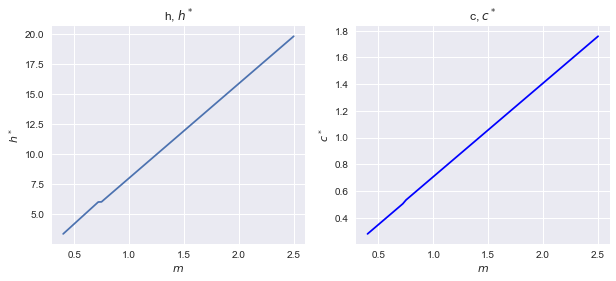

In [19]:
#set number of observations. 
N = 1000

#generate vectors for c, h and m
m_vals = np.linspace(0.4, 2.5, N)  
h_vals = np.empty(N)
c_vals = np.empty(N)


#loop the optimiser over 'm_vals'
for i,m in enumerate(m_vals):
    values.m =m
    lc = u_optimiser(values)
    h_vals[i]=lc[0]
    c_vals[i]=lc[1]

#defining the figures 
fig = plt.figure(figsize=(10,4))

#Left-side plot.
ax_left=fig.add_subplot(1,2,1)
ax_left.plot(m_vals, h_vals)

ax_left.set_title('h, $h^*$')
ax_left.set_xlabel('$m$')
ax_left.set_ylabel('$h^*$')
ax_left.grid(True)

#Right-side plot.
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(m_vals, c_vals,color='blue')

ax_right.set_title('c, $c^*$')
ax_right.set_xlabel('$m$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(True)

#Ploting figure. 
plt.show()


# Question 3 


In [20]:

seed = 1  
mi_mu = -0.4
mi_sigma = 0.35
N2 = 10000

def average_tax(seed, mu, sigma, size, values): 
    """A function that computes average tax
    args:
    seed (int): seed number for generating the normal destribution
    mi_mu (float): Mean value of the underlying normal distribution
    mi_sigma (float): Standard deviation of the underlying normal distribution
    values (Simplenamespace): parameters in the utility function
    
    Returns a float"""
    np.random.seed(seed)
    mi_values = np.random.lognormal(mu, sigma, size)
    h_vals2 = np.empty(N2)
    Poptax = np.empty(N2)
    for i,m1 in enumerate(mi_values):
        values.m= m1
        lc2 = u_optimiser(values)
        h_vals2[i] =lc2[0]
        Poptax[i] = values.tg*h_vals2[i]*values.epsilon+values.tp*max(h_vals2[i]*values.epsilon-values.pquer,0)
    tax1 = sum(Poptax)
    return tax1/N2

ATB = average_tax(seed, mi_mu, mi_sigma, N2,values)
print(f'The average tax burden per household is = {ATB:.5f}.')



The average tax burden per household is = 0.03633.


# Question 4


In [21]:
#Problem 4 
#Update the values 
values2 = SimpleNamespace()
values2.epsilon=0.8
values2.r=0.03
values2.m=0.5
values2.tg=0.01
values2.tp=0.009
values2.pquer=8
values2.phi=0.3

#Calculate the new optimale c and h and the total utility 
h_star2 = u_optimiser(values2)[0]
c_star2 = u_optimiser(values2)[1]
u_star2 = u_func(h_star2, values2)
print(f'The agent will choose optimal quality = {h_star2:.2f}, which implies optimal consumption = {c_star2:.2f}, this yields an overall utility of {u_star2:.2f}')


#Calculate the new average tax 
ATB2 = average_tax(seed, mi_mu, mi_sigma, N2,values2)
print(f'The average tax burden per household is = {ATB2:.6f}.')


The agent will choose optimal quality = 3.95, which implies optimal consumption = 0.35, this yields an overall utility of 0.72
The average tax burden per household is = 0.045036.


# Question 5


In [22]:
tg_array = np.linspace(0,0.1,1000)
N = 10000
def obj(tg,values):
    """A function that computes the difference between a guess and the average tax ATB
    args:
    tg (float): tax 
    values (Simplenamespace): parameters in the utility function
    
    Returns a float"""
    values.tg = tg
    avg = average_tax(seed, mi_mu, mi_sigma, N,values)    
    return avg-ATB



In [23]:
#Define a guess function 
def find_tg(tg_guess,values,kappa=0.5,eps=1e-8,maxiter=500):
    """A function loops over different guess until the the difference between guess and ATB is smaller than eps
    args:
    tg_guess (float): guess for tg 
    values (Simplenamespace): parameters in the utility function
    kappa (float):
    eps (float): lower bound for the difference 
    maxiter(int): max number of iterations 
    Returns a float"""
    tg = tg_guess
    t = 0
    while True:

        # a. step 1: calculate excess tax
        Z1 = obj(tg,values)
        
        # b: step 2: clautate and then stop when it goes below esp 
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: tg = {tg:12.8f} -> excess tax -> {Z1:14.8f}')
            print(f'operation done')
            break    

            
        # d. step 4: return only the first 4 and then every 25th 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: tg = {tg:12.8f} -> excess tax -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        # c. step 3: update tg
        tg = tg*(1-kappa*Z1/ATB)
            
        t += 1    

    return tg


In [24]:
#Find the new tg with a guess starting at 0.01 
tg=find_tg(0.01,values2)
print(f'The new tg is tg={tg:12.8f}')

  0: tg =   0.01000000 -> excess tax ->     0.00870949
  1: tg =   0.00880123 -> excess tax ->     0.00433089
  2: tg =   0.00827659 -> excess tax ->     0.00234566
  3: tg =   0.00800937 -> excess tax ->     0.00131800
  4: tg =   0.00786408 -> excess tax ->     0.00075437
   ...
 25: tg =   0.00767094 -> excess tax ->     0.00000001
operation done
The new tg is tg=  0.00767094
